<a href="https://colab.research.google.com/github/LucaMorocco/Luca-s-room/blob/main/Coding_School_data_science_project_Baseball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn import datasets, model_selection, metrics
# Research question- What makes hall of fame players so great?

Functions and Libraries import

In [2]:
from google.colab import files
uploaded = files.upload()

#Base ball data set from caggle upload

Saving 500hits.csv to 500hits.csv


In [8]:
df_one = pd.read_csv('/content/500hits.csv',encoding = 'latin-1')
df_one.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [9]:
df_one.info()
#It seems like there are no missing values,
#but there are probably incorrect values
# I saw a zero in RBIs, so definitly need to find zeros.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  465 non-null    object 
 1   YRS     465 non-null    int64  
 2   G       465 non-null    int64  
 3   AB      465 non-null    int64  
 4   R       465 non-null    int64  
 5   H       465 non-null    int64  
 6   2B      465 non-null    int64  
 7   3B      465 non-null    int64  
 8   HR      465 non-null    int64  
 9   RBI     465 non-null    int64  
 10  BB      465 non-null    int64  
 11  SO      465 non-null    int64  
 12  SB      465 non-null    int64  
 13  CS      465 non-null    int64  
 14  BA      465 non-null    float64
 15  HOF     465 non-null    int64  
dtypes: float64(1), int64(14), object(1)
memory usage: 58.3+ KB


In [10]:
df_one.describe()
#There are no missing values, but there are some zeros in the RBI category and the strikeout category that need to be fixed.

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.00000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,17.049462,2048.698925,7511.455914,1150.313978,2170.247312,380.952688,78.554839,201.049462,894.260215,783.56129,847.470968,195.905376,58.083871,0.288712,0.329032
std,2.765186,354.391805,1294.065992,289.635071,424.190773,96.483460,49.363030,143.622664,486.193456,327.43195,489.224289,181.845543,48.027509,0.021208,0.474928
min,11.000000,1331.000000,4981.000000,601.000000,1660.000000,177.000000,3.000000,9.000000,0.000000,239.00000,0.000000,7.000000,0.000000,0.246000,0.000000
25%,15.000000,1802.000000,6523.000000,936.000000,1838.000000,312.000000,41.000000,79.000000,640.000000,535.00000,436.000000,63.000000,22.000000,0.273000,0.000000
50%,17.000000,1993.000000,7241.000000,1104.000000,2076.000000,366.000000,67.000000,178.000000,968.000000,736.00000,825.000000,137.000000,52.000000,0.287000,0.000000
75%,19.000000,2247.000000,8180.000000,1296.000000,2375.000000,436.000000,107.000000,292.000000,1206.000000,955.00000,1226.000000,285.000000,84.000000,0.300000,1.000000
max,26.000000,3308.000000,12364.000000,2295.000000,4189.000000,792.000000,309.000000,755.000000,2297.000000,2190.00000,2597.000000,1406.000000,335.000000,0.366000,2.000000


In [11]:
df_one.columns

Index(['PLAYER', 'YRS', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB',
       'SO', 'SB', 'CS', 'BA', 'HOF'],
      dtype='object')

In [12]:
rename={"PLAYER":"Player","YRS":"Years Played", "G":"Games Played",
        "AB":"At Bats","R":"Runs","H":"Hits","2B":"Doubles","3B":"Triples",
        "HR":"Home Runs","RBI":"Runs Batted In","BB":"Walks"
        ,"SO":"Strike Outs","SB":"Stolen Bases","CS":"Caught Stolen",
        "BA":"Batting Average","HOF":"Hall of Fame"}
df_one = df_one.rename(columns= rename)
df_one.head()

,Player,Years Played,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strike Outs,Stolen Bases,Caught Stolen,Batting Average,Hall of Fame
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [13]:
# I am going to try to start finding the missing data and replacing it.
df_one[(df_one['Runs Batted In']<100)]
#looks like Runs batted in category is unusable unless
#I manually replace all the values or drop the rows with zeros.


,Player,Years Played,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strike Outs,Stolen Bases,Caught Stolen,Batting Average,Hall of Fame
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1
10,Nap Lajoie,21,2480,9589,1504,3242,657,163,83,0,516,85,380,21,0.338,1
23,Cap Anson,22,2276,9101,1719,2995,528,124,97,0,952,294,247,0,0.329,1
25,Sam Crawford,19,2517,9570,1391,2961,458,309,97,0,760,104,366,30,0.309,1
27,Willie Keeler,19,2123,8591,1719,2932,241,145,33,0,524,36,495,0,0.341,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,Steve Brodie,12,1437,5699,886,1726,191,89,25,0,420,148,289,0,0.303,0
422,Cy Seymour,16,1528,5682,737,1723,229,96,52,0,354,32,222,0,0.303,0
424,Cupid Childs,13,1456,5618,1214,1720,205,100,20,0,991,117,269,0,0.306,0
448,Hardy Richardson,14,1331,5642,1120,1688,303,126,70,0,377,445,205,0,0.299,0


In [14]:
#This will be for strikeouts
df_one[(df_one['Strike Outs']<115)]
# Strikeouts cannot be use either because the data is incomplete for players
# that played in the early 20th or late 19th century
#Joe Sewell had the lowest strike out percentage so its safe to say
#that most of these numbers are incomplete.

,Player,Years Played,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strike Outs,Stolen Bases,Caught Stolen,Batting Average,Hall of Fame
10,Nap Lajoie,21,2480,9589,1504,3242,657,163,83,0,516,85,380,21,0.338,1
25,Sam Crawford,19,2517,9570,1391,2961,458,309,97,0,760,104,366,30,0.309,1
27,Willie Keeler,19,2123,8591,1719,2932,241,145,33,0,524,36,495,0,0.341,1
91,Bobby Wallace,25,2383,8618,1057,2309,391,143,34,0,774,79,201,2,0.268,1
103,Joe Sewell,14,1903,7132,1141,2226,436,68,49,1055,842,114,74,72,0.312,1
129,Jimmy Collins,14,1725,6795,1055,1999,352,116,65,0,426,32,194,0,0.294,1
143,Elmer Flick,13,1483,5597,950,1752,268,164,48,0,597,0,330,0,0.313,1
159,Lave Cross,21,2275,9072,1333,2645,411,135,47,0,464,90,301,0,0.292,0
206,Fred Tenney,17,1994,7595,1278,2231,270,77,22,0,874,43,285,0,0.294,0
322,Fielder Jones,15,1788,6747,1180,1920,206,75,21,0,817,15,359,0,0.285,0


In [15]:
df_one[(df_one['Caught Stolen']<1)]
#Too many zeros here too so this column must be dropped as well or all players with zeros must be dropped

,Player,Years Played,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strike Outs,Stolen Bases,Caught Stolen,Batting Average,Hall of Fame
12,Paul Waner,20,2549,9459,1627,3152,605,191,113,1309,1091,376,104,0,0.333,1
23,Cap Anson,22,2276,9101,1719,2995,528,124,97,0,952,294,247,0,0.329,1
27,Willie Keeler,19,2123,8591,1719,2932,241,145,33,0,524,36,495,0,0.341,1
28,Jake Beckley,20,2386,9526,1600,2930,473,243,86,0,616,270,315,0,0.308,1
33,Mel Ott,22,2730,9456,1859,2876,488,72,511,1860,1708,896,89,0,0.304,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,Frank McCormick,13,1534,5723,722,1711,334,26,128,951,399,189,27,0,0.299,0
430,Augie Galan,16,1742,5937,1004,1706,336,74,100,830,979,393,123,0,0.287,0
436,Pinky Whitney,12,1539,5765,696,1701,303,56,93,927,400,438,45,0,0.295,0
448,Hardy Richardson,14,1331,5642,1120,1688,303,126,70,0,377,445,205,0,0.299,0


In [16]:
df_one[(df_one['Hall of Fame']> 1)]
# obviously this value is incorrect should be a one



,Player,Years Played,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strike Outs,Stolen Bases,Caught Stolen,Batting Average,Hall of Fame
160,Tim Raines Sr.,23,2502,8872,1571,2605,430,113,170,980,1330,966,808,146,0.294,2


In [17]:
df_one= df_one.drop(columns = ['Runs Batted In','Strike Outs', 'Caught Stolen'], axis = 1)
df_one.head()

,Player,Years Played,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Walks,Stolen Bases,Batting Average,Hall of Fame
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,1249,892,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1599,78,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,1381,432,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1082,358,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,963,722,0.329,1


In [18]:
df_one.iloc[160,12]=1
df_one.iloc[160,12]
#Fixed that datapoint

np.int64(1)

I am going to start creating a bunch of different graphs to investigate my data and see if I can discover any trends

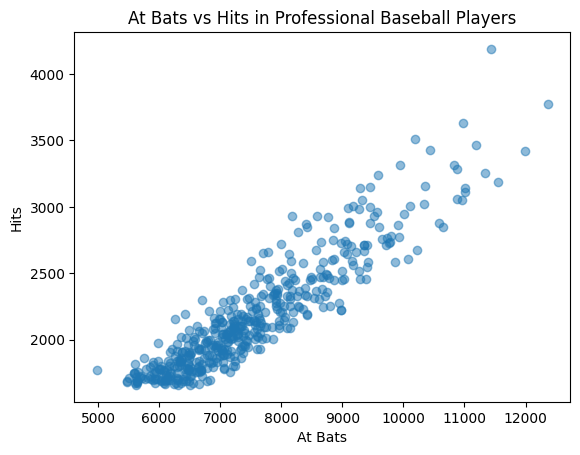

In [19]:
#this data suggests that more at bats will lead to more hits
plt.scatter(df_one['At Bats'],df_one['Hits'], alpha = 0.5)
plt.title("At Bats vs Hits in Professional Baseball Players")
plt.xlabel("At Bats")
plt.ylabel("Hits")
plt.show()

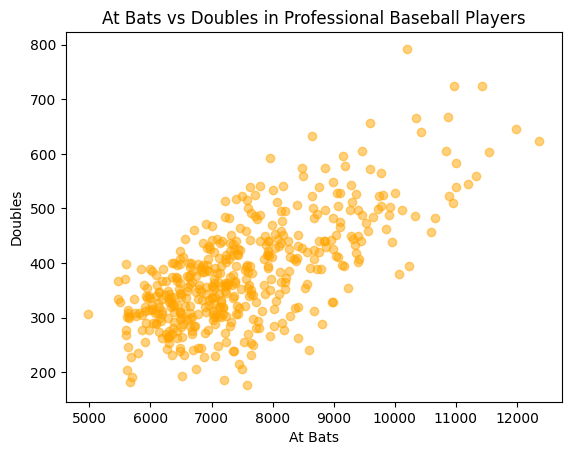

In [20]:
plt.scatter(df_one['At Bats'],df_one['Doubles'], alpha = 0.5, color = "orange")
plt.title("At Bats vs Doubles in Professional Baseball Players")
plt.xlabel("At Bats")
plt.ylabel("Doubles")
plt.show()
# A decently linear relationship

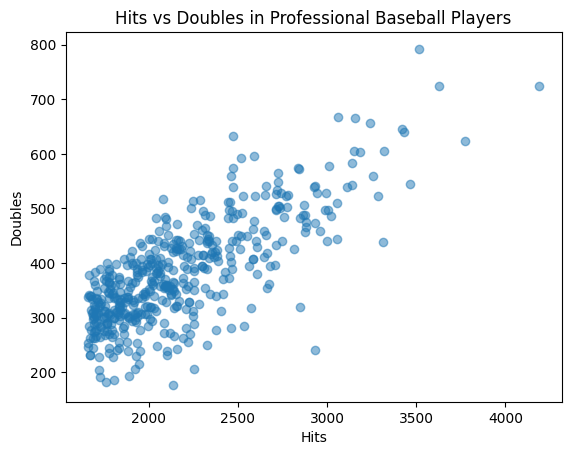

In [21]:
# doubles conform a lot more to the tend of more hits = more doubles
plt.scatter(df_one['Hits'],df_one['Doubles'], alpha = 0.5)
plt.title("Hits vs Doubles in Professional Baseball Players")
plt.xlabel("Hits")
plt.ylabel("Doubles")
plt.show()

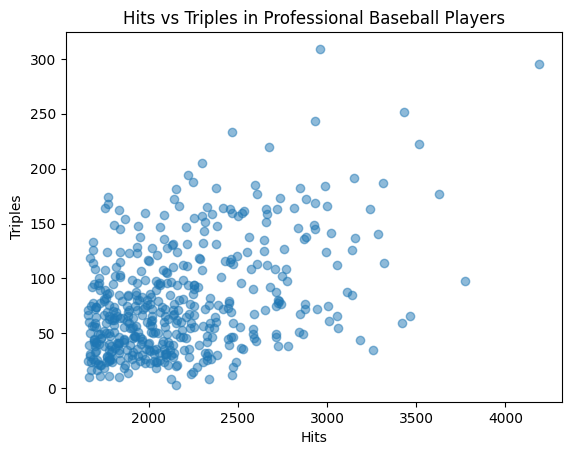

In [22]:
#Its seems like Triples go against the trend of more at hits= more triples, but less severely than home runs
plt.scatter(df_one['Hits'],df_one['Triples'], alpha= 0.5)
plt.title("Hits vs Triples in Professional Baseball Players")
plt.xlabel("Hits")
plt.ylabel("Triples")
plt.show()

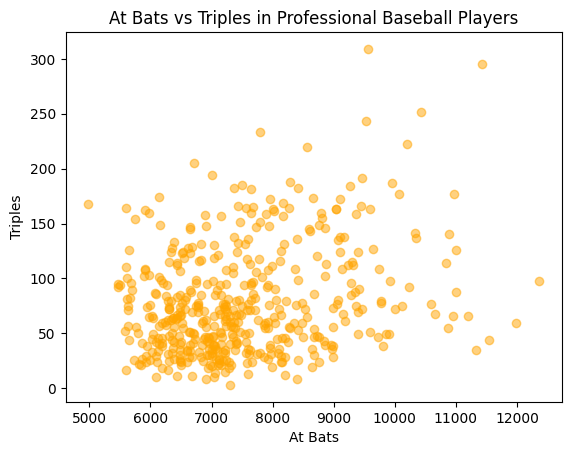

In [23]:
plt.scatter(df_one['At Bats'],df_one['Triples'], alpha = 0.5, color = "orange")
plt.title("At Bats vs Triples in Professional Baseball Players")
plt.xlabel("At Bats")
plt.ylabel("Triples")
plt.show()
# Like with hits, there is definitly more of a random spread of the data than in the case of doubles

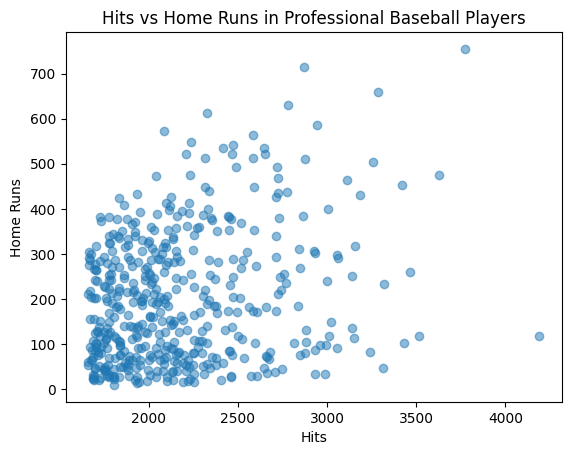

In [24]:
# It seems like Home runs go against the trend more hits = more home runs
plt.scatter(df_one['Hits'],df_one['Home Runs'], alpha = 0.5)
plt.title("Hits vs Home Runs in Professional Baseball Players")
plt.xlabel("Hits")
plt.ylabel("Home Runs")
plt.show()

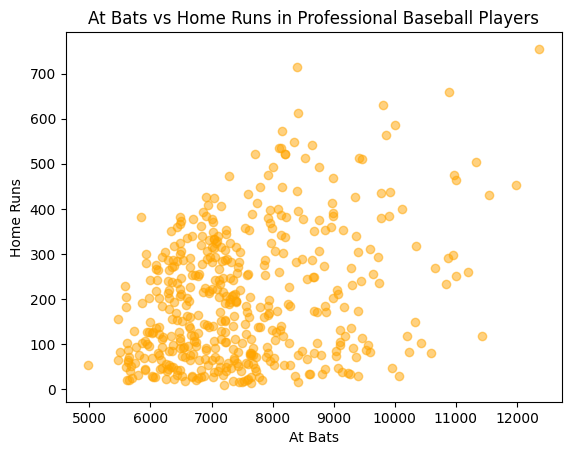

In [25]:
plt.scatter(df_one['At Bats'],df_one['Home Runs'], alpha = 0.5, color = "orange")
plt.title("At Bats vs Home Runs in Professional Baseball Players")
plt.xlabel("At Bats")
plt.ylabel("Home Runs")
plt.show()

Now I am going to add in hall of fame to the plots to see if any patterns emerge

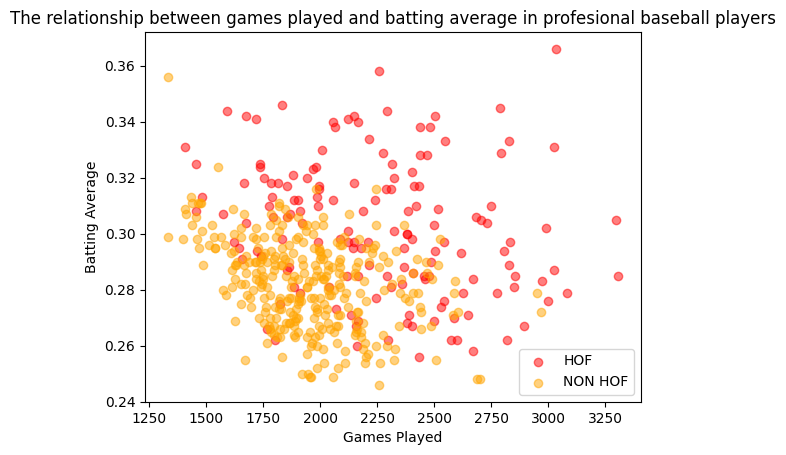

In [26]:
# This plot is interesting because it shows that players with a high batting average and/or a lot of games played are more likely
# to be inducted into the hall of fame

plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Games Played'],df_one[df_one['Hall of Fame'] == 1]
 ['Batting Average'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Games Played'],df_one[df_one['Hall of Fame'] == 0]
 ['Batting Average'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between games played and batting average in profesional baseball players")
plt.xlabel('Games Played')
plt.ylabel('Batting Average')
plt.legend()
plt.show()

These graphs are all Batting average in the Y

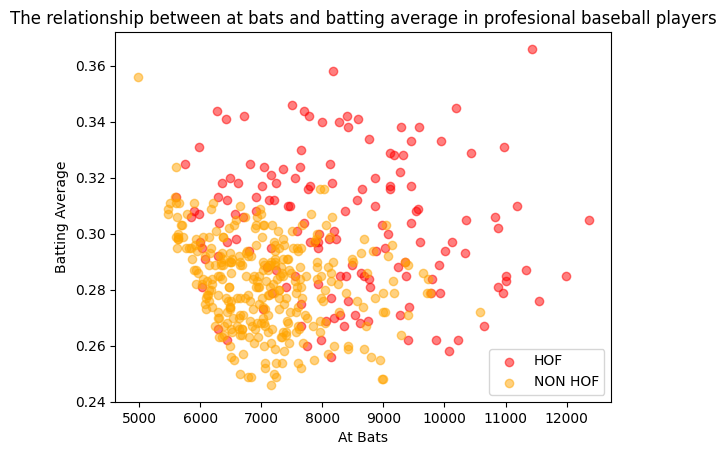

In [27]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['At Bats'],df_one[df_one['Hall of Fame'] == 1]
 ['Batting Average'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['At Bats'],df_one[df_one['Hall of Fame'] == 0]
 ['Batting Average'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between at bats and batting average in profesional baseball players")
plt.xlabel('At Bats')
plt.ylabel('Batting Average')
plt.legend()
plt.show()

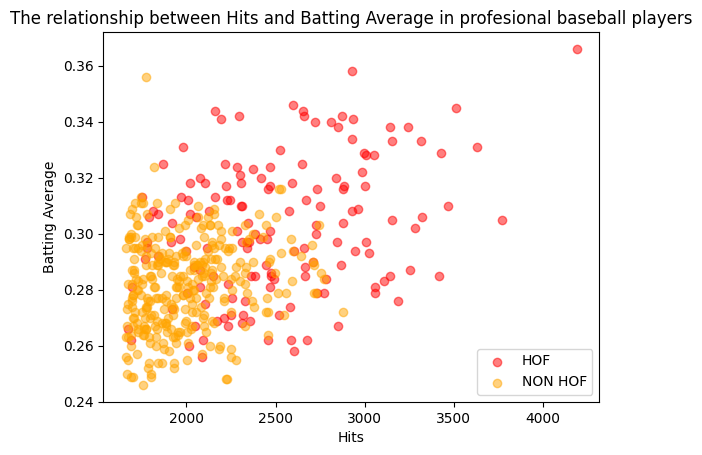

In [28]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Hits'],df_one[df_one['Hall of Fame'] == 1]
 ['Batting Average'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Hits'],df_one[df_one['Hall of Fame'] == 0]
 ['Batting Average'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Hits and Batting Average in profesional baseball players")
plt.xlabel('Hits')
plt.ylabel('Batting Average')
plt.legend()
plt.show()

These Graphs have Hits i the Y

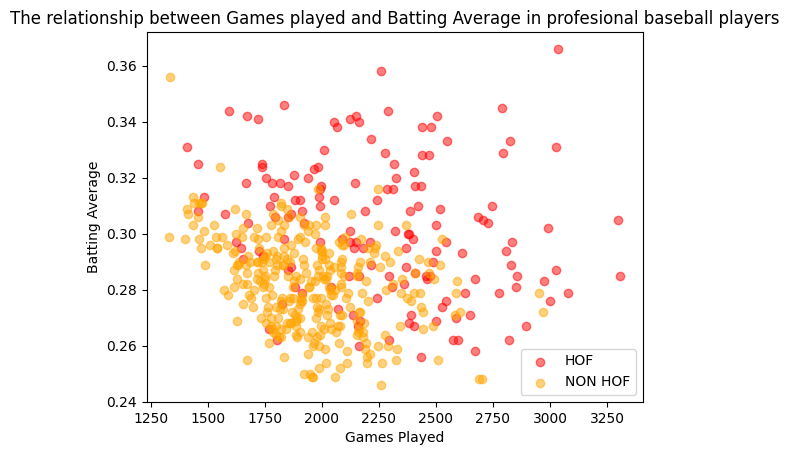

In [29]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Games Played'],df_one[df_one['Hall of Fame'] == 1]
 ['Batting Average'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Games Played'],df_one[df_one['Hall of Fame'] == 0]
 ['Batting Average'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Games played and Batting Average in profesional baseball players")
plt.xlabel('Games Played')
plt.ylabel('Batting Average')
plt.legend()
plt.show()
# this plot is super interesting because it suggests that once again longevity is important for hall of fame players. It also
# hints that there are other factors that determine if you go to the hall of fame because there is a large overlap betweeen HOF
#and Non HOF players

These Graphs have Doubles in the Y

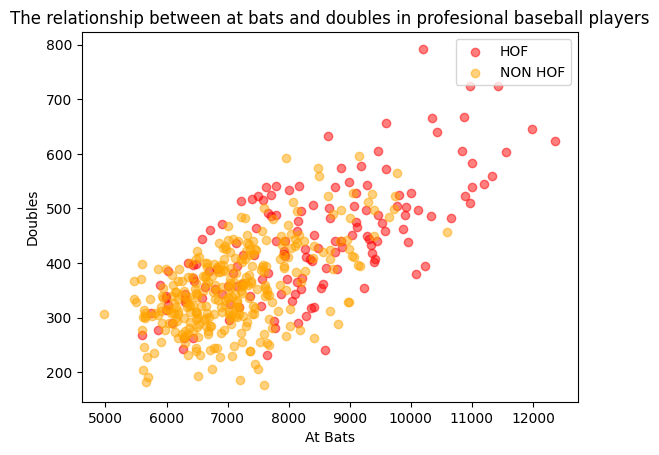

In [30]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['At Bats'],df_one[df_one['Hall of Fame'] == 1]
 ['Doubles'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['At Bats'],df_one[df_one['Hall of Fame'] == 0]
 ['Doubles'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between at bats and doubles in profesional baseball players")
plt.xlabel('At Bats')
plt.ylabel('Doubles')
plt.legend()
plt.show()

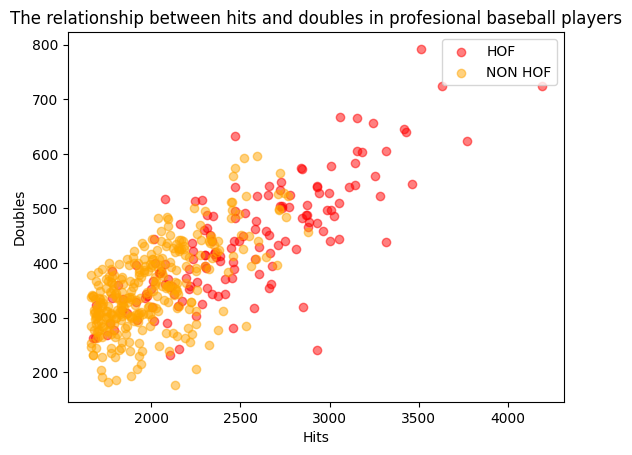

In [31]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Hits'],df_one[df_one['Hall of Fame'] == 1]
 ['Doubles'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Hits'],df_one[df_one['Hall of Fame'] == 0]
 ['Doubles'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between hits and doubles in profesional baseball players")
plt.xlabel('Hits')
plt.ylabel('Doubles')
plt.legend()
plt.show()

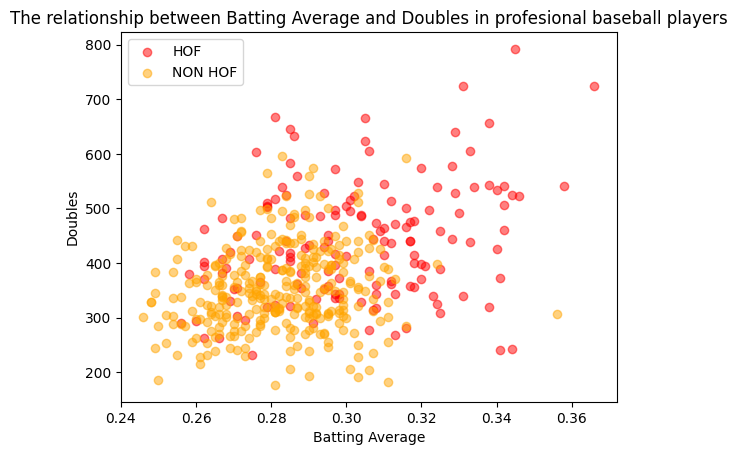

In [32]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Batting Average'],df_one[df_one['Hall of Fame'] == 1]
 ['Doubles'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Batting Average'],df_one[df_one['Hall of Fame'] == 0]
 ['Doubles'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Batting Average and Doubles in profesional baseball players")
plt.xlabel('Batting Average')
plt.ylabel('Doubles')
plt.legend()
plt.show()

These graphs have triples

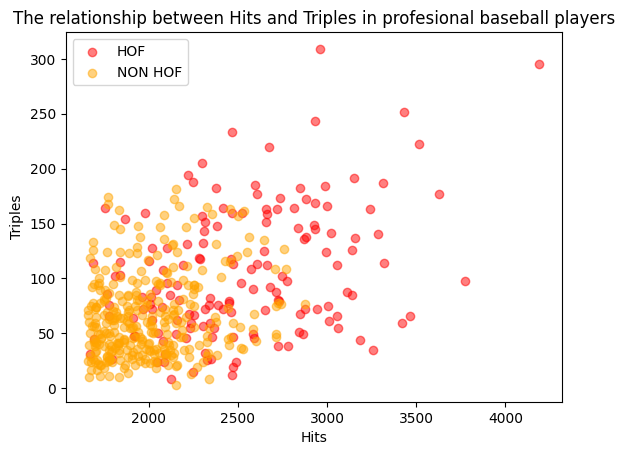

In [33]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Hits'],df_one[df_one['Hall of Fame'] == 1]
 ['Triples'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Hits'],df_one[df_one['Hall of Fame'] == 0]
 ['Triples'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Hits and Triples in profesional baseball players")
plt.xlabel('Hits')
plt.ylabel('Triples')
plt.legend()
plt.show()

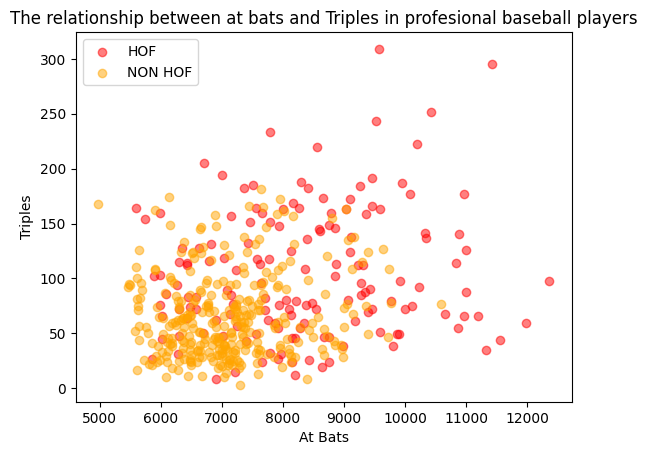

In [34]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['At Bats'],df_one[df_one['Hall of Fame'] == 1]
 ['Triples'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['At Bats'],df_one[df_one['Hall of Fame'] == 0]
 ['Triples'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between at bats and Triples in profesional baseball players")
plt.xlabel('At Bats')
plt.ylabel('Triples')
plt.legend()
plt.show()

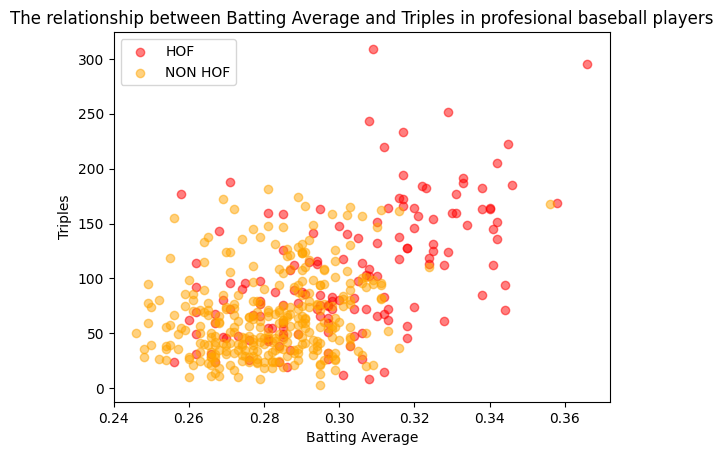

In [35]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Batting Average'],df_one[df_one['Hall of Fame'] == 1]
 ['Triples'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Batting Average'],df_one[df_one['Hall of Fame'] == 0]
 ['Triples'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Batting Average and Triples in profesional baseball players")
plt.xlabel('Batting Average')
plt.ylabel('Triples')
plt.legend()
plt.show()

These graphs have Home Runs

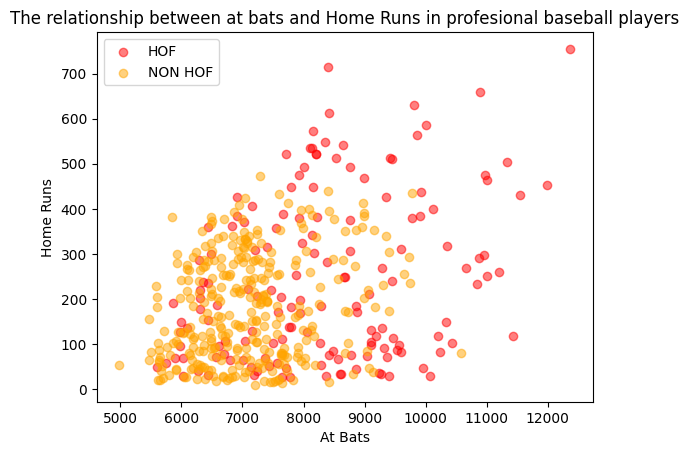

In [36]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['At Bats'],df_one[df_one['Hall of Fame'] == 1]
 ['Home Runs'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['At Bats'],df_one[df_one['Hall of Fame'] == 0]
 ['Home Runs'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between at bats and Home Runs in profesional baseball players")
plt.xlabel('At Bats')
plt.ylabel('Home Runs')
plt.legend()
plt.show()

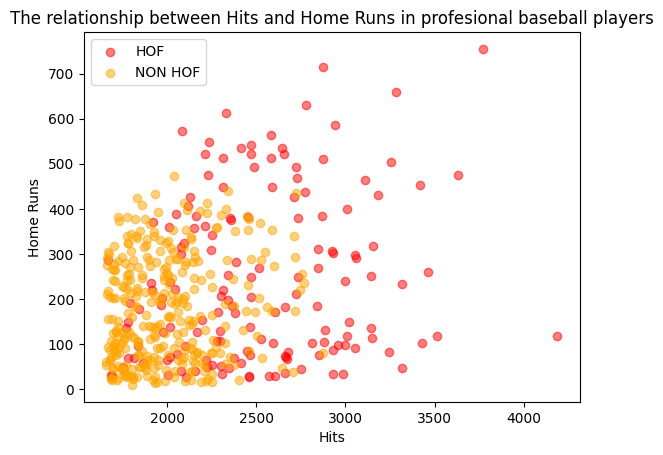

In [37]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Hits'],df_one[df_one['Hall of Fame'] == 1]
 ['Home Runs'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Hits'],df_one[df_one['Hall of Fame'] == 0]
 ['Home Runs'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Hits and Home Runs in profesional baseball players")
plt.xlabel('Hits')
plt.ylabel('Home Runs')
plt.legend()
plt.show()

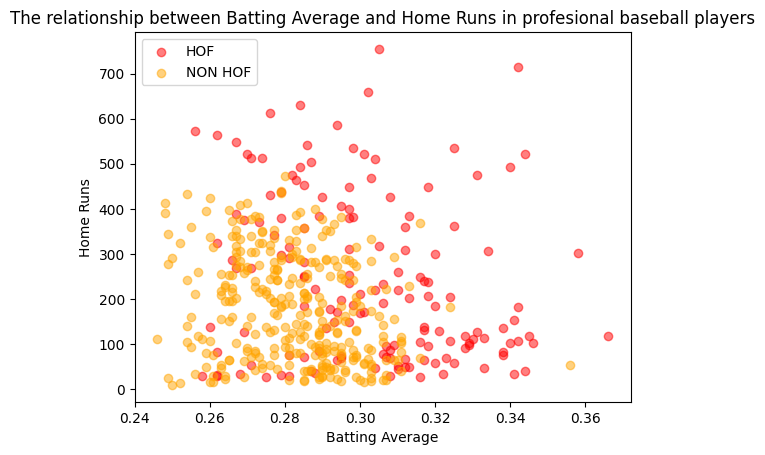

In [38]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Batting Average'],df_one[df_one['Hall of Fame'] == 1]
 ['Home Runs'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Batting Average'],df_one[df_one['Hall of Fame'] == 0]
 ['Home Runs'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Batting Average and Home Runs in profesional baseball players")
plt.xlabel('Batting Average')
plt.ylabel('Home Runs')
plt.legend()
plt.show()

I want to see the spreads of HOF and Non HOF batting averages.

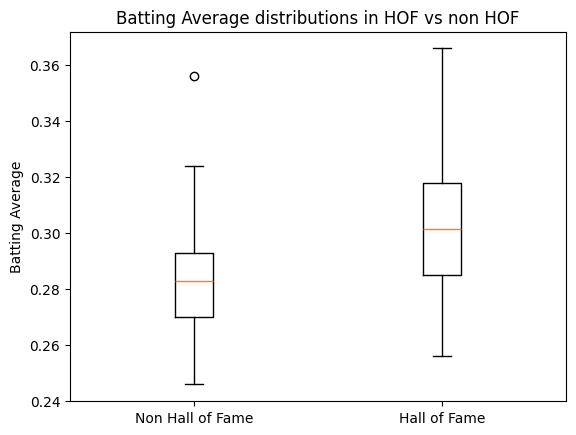

In [39]:

hof = [df_one[df_one['Hall of Fame'] == i]['Batting Average'] for i in range(2)]

plt.boxplot(hof, labels=['Non Hall of Fame','Hall of Fame'])

plt.title("Batting Average distributions in HOF vs non HOF")
plt.ylabel('Batting Average')

plt.show()


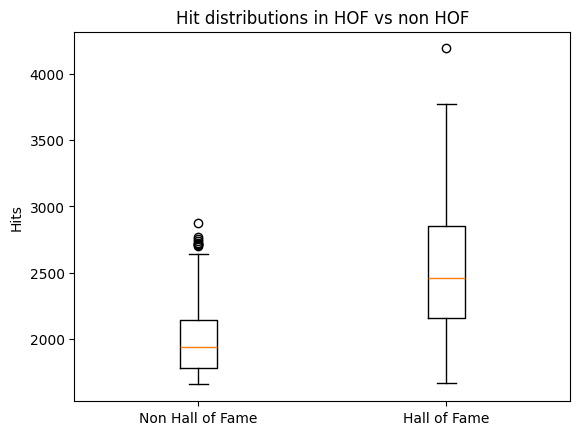

In [40]:
hof = [df_one[df_one['Hall of Fame'] == i]['Hits'] for i in range(2)]

plt.boxplot(hof, labels=['Non Hall of Fame','Hall of Fame'])

plt.title("Hit distributions in HOF vs non HOF")
plt.ylabel('Hits')

plt.show()


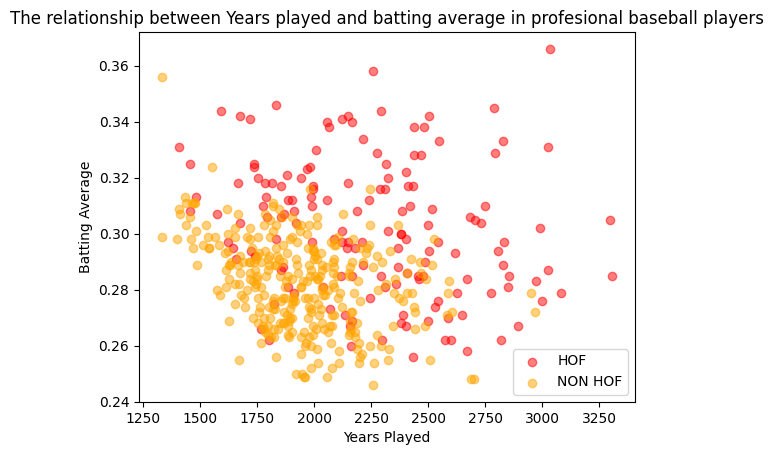

In [41]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Games Played'],df_one[df_one['Hall of Fame'] == 1]
 ['Batting Average'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Games Played'],df_one[df_one['Hall of Fame'] == 0]
 ['Batting Average'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Years played and batting average in profesional baseball players")
plt.xlabel('Years Played')
plt.ylabel('Batting Average')
plt.legend()
plt.show()

I am going to use some T-tests in order to figure out which variables have a signigicant effect on whether or not you make the Hall of Fame

In [63]:
from scipy import stats


In [68]:
#T-test for Batting Average.
#Hypothesis- Batting Average affects entry into the HOF
#Null Hypothesis- Batting average has no effect on HOF entry
#P-Value< .05 to reject Null Hypothesis
Hall_fame= df_one[df_one['Hall of Fame'] == 1]['Batting Average']
non_fame= df_one[df_one["Hall of Fame"] == 0]['Batting Average']
t_stat, p_val= stats.ttest_ind(Hall_fame, non_fame)
print(f"T-Stat: {t_stat}, P-Value: {p_val}\n")

if p_val > 0.05:
    print("There is no statistically significant difference in batting averages.")
else:
    print("There is a statistically significant difference between the batting averages.")

T-Stat: 10.76076889599576, P-Value: 2.9671479804349535e-24

There is a statistically significant difference between the batting averages.


In [69]:
#T-test for Hits
#Hypothesis- number of hits affect entry into the HOF
#Null Hypothesis- number of hits does not affect entry into the Hof
#P-Value< .05 to reject the Null hypothesis
Hall_fame= df_one[df_one['Hall of Fame'] == 1]['Hits']
non_fame= df_one[df_one["Hall of Fame"] == 0]['Hits']
t_stat, p_val= stats.ttest_ind(Hall_fame, non_fame)
print(f"T-Stat: {t_stat}, P-Value: {p_val}\n")

if p_val > 0.05:
    print("There is no statistically significant difference between the hits.")
else:
    print("There is a statistically significant difference between the hits.")

T-Stat: 14.988016372846797, P-Value: 1.1034486050792006e-41

There is a statistically significant difference between the hits.


In [70]:
#T-test for Home Runs
#Hypothesis-number of hits affect entry into the HOF
#Null Hypothesis- number of hits does not affect entry into the HOF
#P-value < .05 to reject the Null Hypothesis
Hall_fame= df_one[df_one['Hall of Fame'] == 1]['Home Runs']
non_fame= df_one[df_one["Hall of Fame"] == 0]['Home Runs']
t_stat, p_val= stats.ttest_ind(Hall_fame, non_fame)
print(f"T-Stat: {t_stat}, P-Value: {p_val}\n")

if p_val > 0.05:
    print("There is no statistically significant difference between the home runs.")
else:
    print("There is a statistically significant difference between the hhome runs.")

T-Stat: 4.534215029199838, P-Value: 7.372389659068189e-06

There is a statistically significant difference between the hhome runs.


In [74]:
Hall_fame= df_one[df_one['Hall of Fame'] == 1]['Games Played']
non_fame= df_one[df_one["Hall of Fame"] == 0]['Games Played']
t_stat, p_val= stats.ttest_ind(Hall_fame, non_fame)
print(f"T-Stat: {t_stat}, P-Value: {p_val}\n")

if p_val > 0.05:
    print("There is no statistically significant difference between the games played.")
else:
    print("There is a statistically significant difference between the games played.")

T-Stat: 9.42110264707501, P-Value: 2.1295320818458277e-19

There is a statistically significant difference between the games played.


In [90]:
#Because every single value is giving me a low p-value, I am gonna
#try seperating the HOF from non HOF and calculating averages to compare
df_two = df_one.drop(columns = 'Player')
hall_df= df_two[df_two['Hall of Fame']== 1]
non_df= df_two[df_two["Hall of Fame"] == 0]
hall_df.mean()


,0
Years Played,18.506579
Games Played,2252.447368
At Bats,8342.190789
Runs,1376.927632
Hits,2517.789474
Doubles,439.125000
Triples,104.822368
Home Runs,243.500000
Walks,948.855263
Stolen Bases,225.269737


In [91]:
non_df.mean()

,0
Years Played,16.341853
Games Played,1949.753994
At Bats,7108.031949
Runs,1040.265176
Hits,2001.472843
Doubles,352.702875
Triples,65.798722
Home Runs,180.434505
Walks,703.290735
Stolen Bases,181.645367


Since Hits and batting average gave a pretty good seperation line between Hall of famers and non hall of famers, I am going to Use K nearest Neighbors with these two variables in order to predict who gets in the hall of fame

In [42]:
features = df_one[["Batting Average","Hits"]]
label = df_one["Hall of Fame"]

In [43]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size= 0.2, random_state =42)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
BBmodel = KNeighborsClassifier(n_neighbors= 4)

In [46]:
BBmodel.fit(X_train, y_train)
BBpredict = BBmodel.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test,BBpredict))

Accuracy Score:  0.8064516129032258


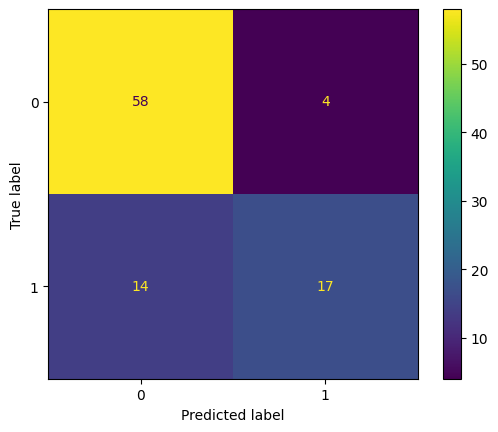

In [47]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,BBpredict)

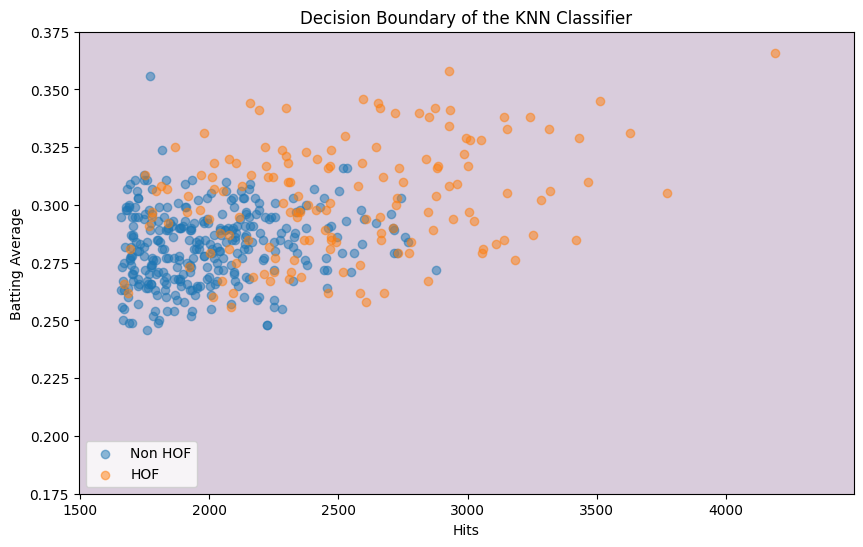

In [48]:
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(1500, 4500, 10),
                     np.arange(0.2, 0.4, 0.05))
z = BBmodel.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.2)

for label, data in df_one.groupby('Hall of Fame'):
  ax.scatter(data["Hits"], data["Batting Average"], label=["Non HOF","HOF"][label], alpha=0.5)

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("Hits")
ax.set_ylabel("Batting Average")
ax.legend()
plt.show()

I am now going to try playing around with different K Values to see wich one is the most accurate.

{1: np.float64(65.59139784946237), 3: np.float64(78.49462365591397), 5: np.float64(82.79569892473118), 7: np.float64(82.79569892473118), 9: np.float64(82.79569892473118), 11: np.float64(84.94623655913979), 13: np.float64(80.64516129032258), 15: np.float64(80.64516129032258), 17: np.float64(81.72043010752688), 19: np.float64(82.79569892473118), 21: np.float64(82.79569892473118), 23: np.float64(83.87096774193549), 25: np.float64(83.87096774193549), 27: np.float64(80.64516129032258), 29: np.float64(80.64516129032258), 31: np.float64(79.56989247311827), 33: np.float64(81.72043010752688), 35: np.float64(82.79569892473118), 37: np.float64(84.94623655913979), 39: np.float64(83.87096774193549), 41: np.float64(83.87096774193549), 43: np.float64(83.87096774193549), 45: np.float64(81.72043010752688), 47: np.float64(81.72043010752688), 49: np.float64(81.72043010752688)}


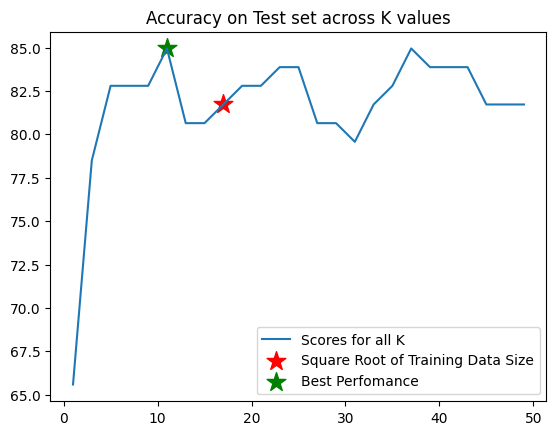

Top score of optimal classifier: 84.94623655913979
Optimal K 11


In [49]:

scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across K values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')


k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Optimal K " + str(best_k))